<a href="https://colab.research.google.com/github/jitzerttok51/TU-Works/blob/main/%D0%9C%D0%B8%D1%88%D0%BE%20%D0%B8%20%D0%96%D0%B8%D0%B2%D0%BA%D0%BE/%D0%9E%D0%92%D0%90%D0%A2%20%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%20%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf *
!curl -Lk https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip --output /tmp/download.zip
!unzip -q /tmp/download.zip -d .
!mv cats_and_dogs_filtered dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 65.4M  100 65.4M    0     0   180M      0 --:--:-- --:--:-- --:--:--  180M


In [2]:
!ls -l dataset/validation/cats | wc -l

501


In [3]:
import os
import os.path as path
import tensorflow as tf
import tensorflow.keras as kr
import matplotlib.pyplot as plt

In [4]:
BASE_DIR = 'dataset'
TRAIN_DIR = path.join(BASE_DIR, 'train')
TEST_DIR = path.join(BASE_DIR, 'validation')

In [5]:
model = kr.models.Sequential([
    kr.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    kr.layers.MaxPooling2D(2,2),
    kr.layers.Conv2D(32, (3,3), activation='relu'),
    kr.layers.MaxPooling2D(2,2), 
    kr.layers.Conv2D(64, (3,3), activation='relu'), 
    kr.layers.MaxPooling2D(2,2),
    kr.layers.Flatten(), 
    kr.layers.Dense(512, activation='relu'), 
    kr.layers.Dense(1, activation='sigmoid')  
])

model.summary()

model.compile(optimizer=kr.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [6]:
trainGen = kr.preprocessing.image.ImageDataGenerator(
                                   rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
testGen = kr.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.)
trainData = trainGen.flow_from_directory(TRAIN_DIR, batch_size = 20, class_mode = 'binary', target_size = (150, 150))
testData = testGen.flow_from_directory(TEST_DIR, batch_size = 20, class_mode = 'binary', target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


2
<class 'tuple'>
2000


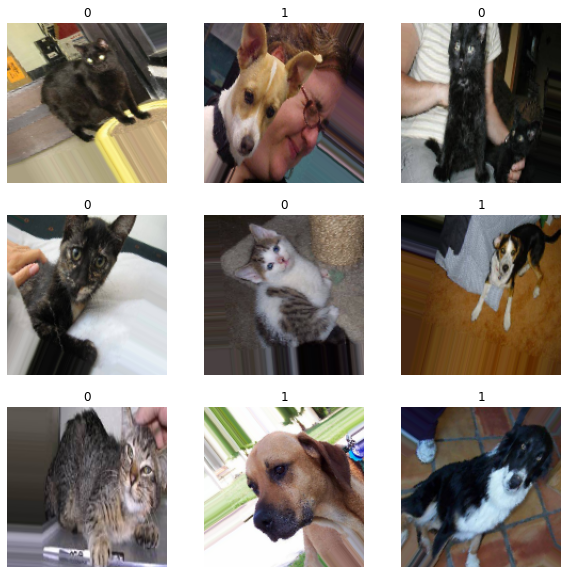

In [7]:
x = trainData[0]
print(len(x))
print(type(x))
print(len(trainData)*x[0].shape[0])

# batches = [(images, labels)]
# images = ndarray 20

plt.figure(figsize=(10,10))
for (images, labels) in [x]:
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow((images[i]*255).astype('uint8'))
    plt.title(int(labels[i]))
    plt.axis('off')

In [ ]:
history = model.fit(
    trainData,
    validation_data=testData,
    steps_per_epoch=100,
    epochs=50,
    validation_steps=50)

Epoch 1/50
100/100 [==============================] - 93s 912ms/step - loss: 0.7184 - accuracy: 0.5345 - val_loss: 0.6531 - val_accuracy: 0.5620
